In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

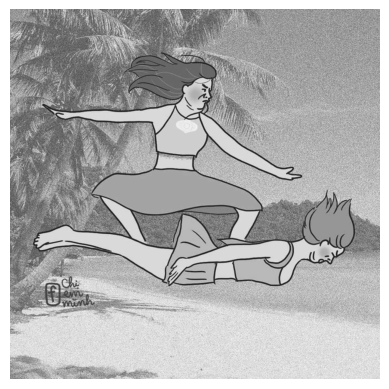

In [2]:
img = np.array(Image.open('../image_processing.jpg').convert('L'))
plt.gray()
plt.imshow(img)
plt.axis('off')
plt.show()

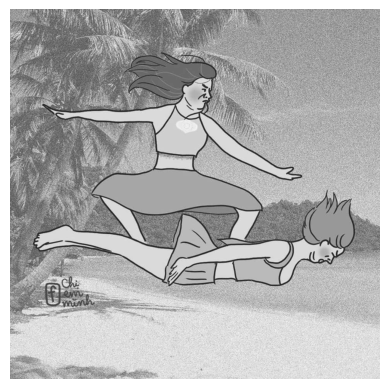

In [3]:


img = cv2.imread('../image_processing.jpg', cv2.IMREAD_GRAYSCALE)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.axis('off')
plt.show()

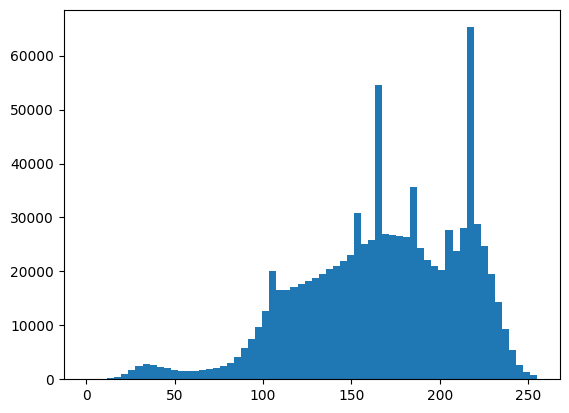

In [4]:
plt.hist(img.ravel(), bins=64)
plt.show()

# can bang histogram

In [5]:
# def get_hist(im, bins):
#     hist_img = np.zeros(bins)
#     range_bin = 256 // bins
#     for px in im.ravel():
#         hist_img[px // range_bin] += 1
#     return np.array(hist_img)

def get_hist(im, bins):
    hist_img, _ = np.histogram(im.ravel(), bins=bins)
    return hist_img

<BarContainer object of 64 artists>

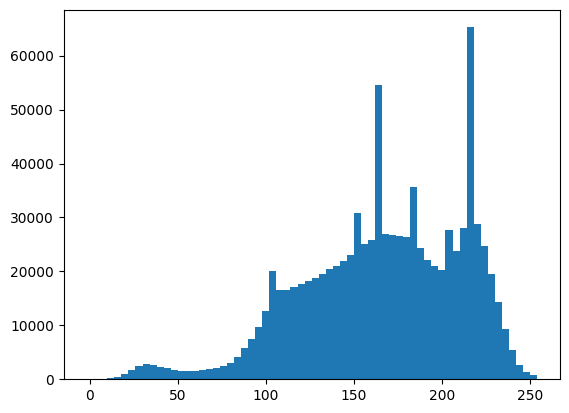

In [6]:
plt.bar(np.arange(256, step=256//64), get_hist(img, 64), width=256//64)

In [7]:
def get_pdf(im, bins):
    hist_img = get_hist(im, bins)
    pdf_img = hist_img / (im.shape[0] * im.shape[1])
    return pdf_img

In [8]:
# def get_cdf(im, bins):
#     pdf_img = get_pdf(im, bins)
#     cdf_img = []
#     cumsum = 0
#     for i in range(0, len(pdf_img)):
#         cumsum += pdf_img[i]
#         cdf_img.append(cumsum)
#     return np.array(cdf_img)

def get_cdf(im, bins):
    pdf_img = get_pdf(im, bins)
    cdf_img = np.cumsum(pdf_img)
    return cdf_img

In [9]:
def get_LUT(im, bins):
    return np.around((bins - 1) * get_cdf(im, bins))

In [10]:
# def remap_Image(im, bins):
#     LUT = get_LUT(im, bins)
#     remap = im.ravel()
#     for i in range(len(LUT)):
#         for j in range(len(remap)):
#             if (i == j):
#                 remap[j] = LUT[i]
#     return remap.reshape(im.shape)

def remap_Image(im, bins):
    LUT = get_LUT(im, bins)
    remap = im.copy()
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            remap[i, j] = LUT[im[i, j]]
    return remap


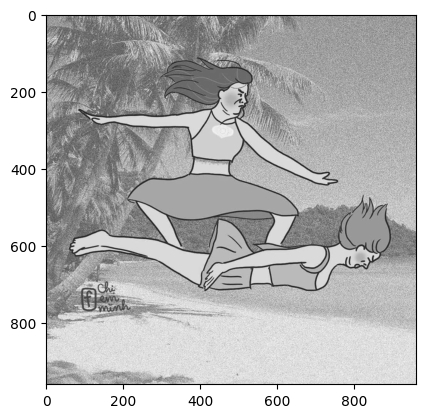

In [20]:
plt.imshow(img)

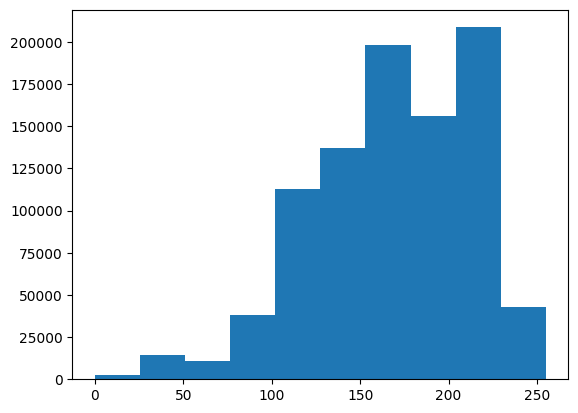

In [21]:
plt.hist(img.ravel())
plt.show()

In [22]:
img

array([[149, 163, 147, ..., 171, 163, 160],
       [137, 153, 155, ..., 176, 168, 166],
       [153, 155, 149, ..., 164, 156, 156],
       ...,
       [ 90, 127, 165, ..., 206, 216, 223],
       [132, 133, 166, ..., 203, 214, 221],
       [205, 125, 131, ..., 214, 225, 229]], dtype=uint8)

In [23]:
img.shape

(960, 960)

In [24]:
remap_Image(img, 256).shape

(960, 960)

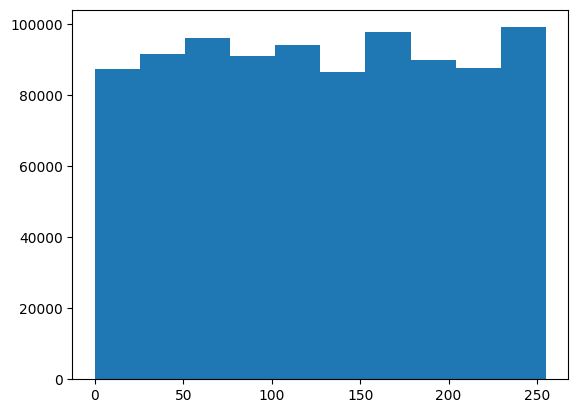

In [25]:
plt.hist(remap_Image(img, 256).ravel())
plt.show()

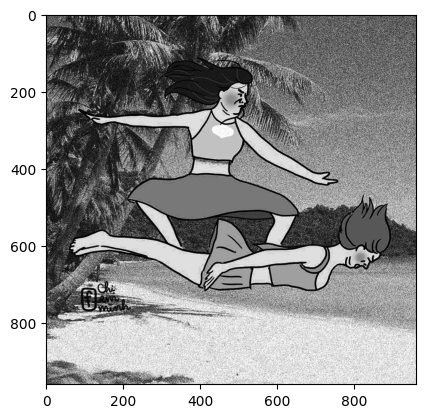

In [26]:
plt.imshow(remap_Image(img, 256))

# Mục tiêu: remap ảnh I với min = mI và max = MI sao cho histogram của nó gần giá trị hằng nhất có thể và có min = mJ và max = MJ

# tạo ra ảnh K từ ảnh I sao cho K có CDF gần gống với CDF của J

In [28]:
image_I = cv2.imread('../hists_match/image_I.jpg', cv2.COLOR_BGR2RGB)
image_I = cv2.cvtColor(image_I, cv2.COLOR_BGR2RGB)
image_J = cv2.imread('../hists_match/image_J.jpg')
image_J = cv2.cvtColor(image_J, cv2.COLOR_BGR2RGB)


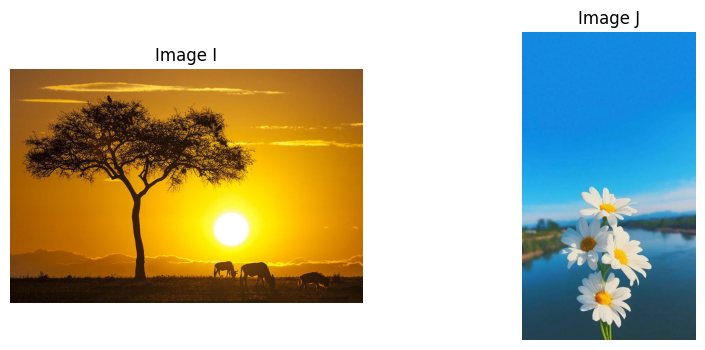

In [34]:
plt.figure(figsize=(10, 4))

plt.subplot(121)

plt.imshow(image_I)
plt.axis('off')
plt.title("Image I")

plt.subplot(122)
plt.imshow(image_J)
plt.axis('off')
plt.title("Image J")

plt.show()

In [35]:
# tach tung kenh mau cua moi anh
R_Image_I, G_Image_I, B_Image_I = cv2.split(image_I)
R_Image_J, G_Image_J, B_Image_J= cv2.split(image_J)


In [36]:
# a, b = np.histogram(R_Image_I, bins=256)

In [37]:
# tinh histogram cho tung kenh mau
# Image_I
hist_R_I = get_hist(R_Image_I, bins=256)
hist_G_I = get_hist(G_Image_I, bins=256)
hist_B_I = get_hist(B_Image_I, bins=256)


# Image_J
hist_R_J = get_hist(R_Image_J, bins=256)
hist_G_J = get_hist(G_Image_J, bins=256)
hist_B_J = get_hist(B_Image_J, bins=256)


In [38]:
# tinh cdf cho tung kenh mau
# image_I
cdf_R_I = np.cumsum(hist_R_I) / (image_I.shape[0] * image_I.shape[1])
cdf_G_I = np.cumsum(hist_G_I) / (image_I.shape[0] * image_I.shape[1])
cdf_B_I = np.cumsum(hist_B_I) / (image_I.shape[0] * image_I.shape[1])

# image_J
cdf_R_J = np.cumsum(hist_R_J) / (image_J.shape[0] * image_J.shape[1])
cdf_G_J = np.cumsum(hist_G_J) / (image_J.shape[0] * image_J.shape[1])
cdf_B_J = np.cumsum(hist_B_J) / (image_J.shape[0] * image_J.shape[1])


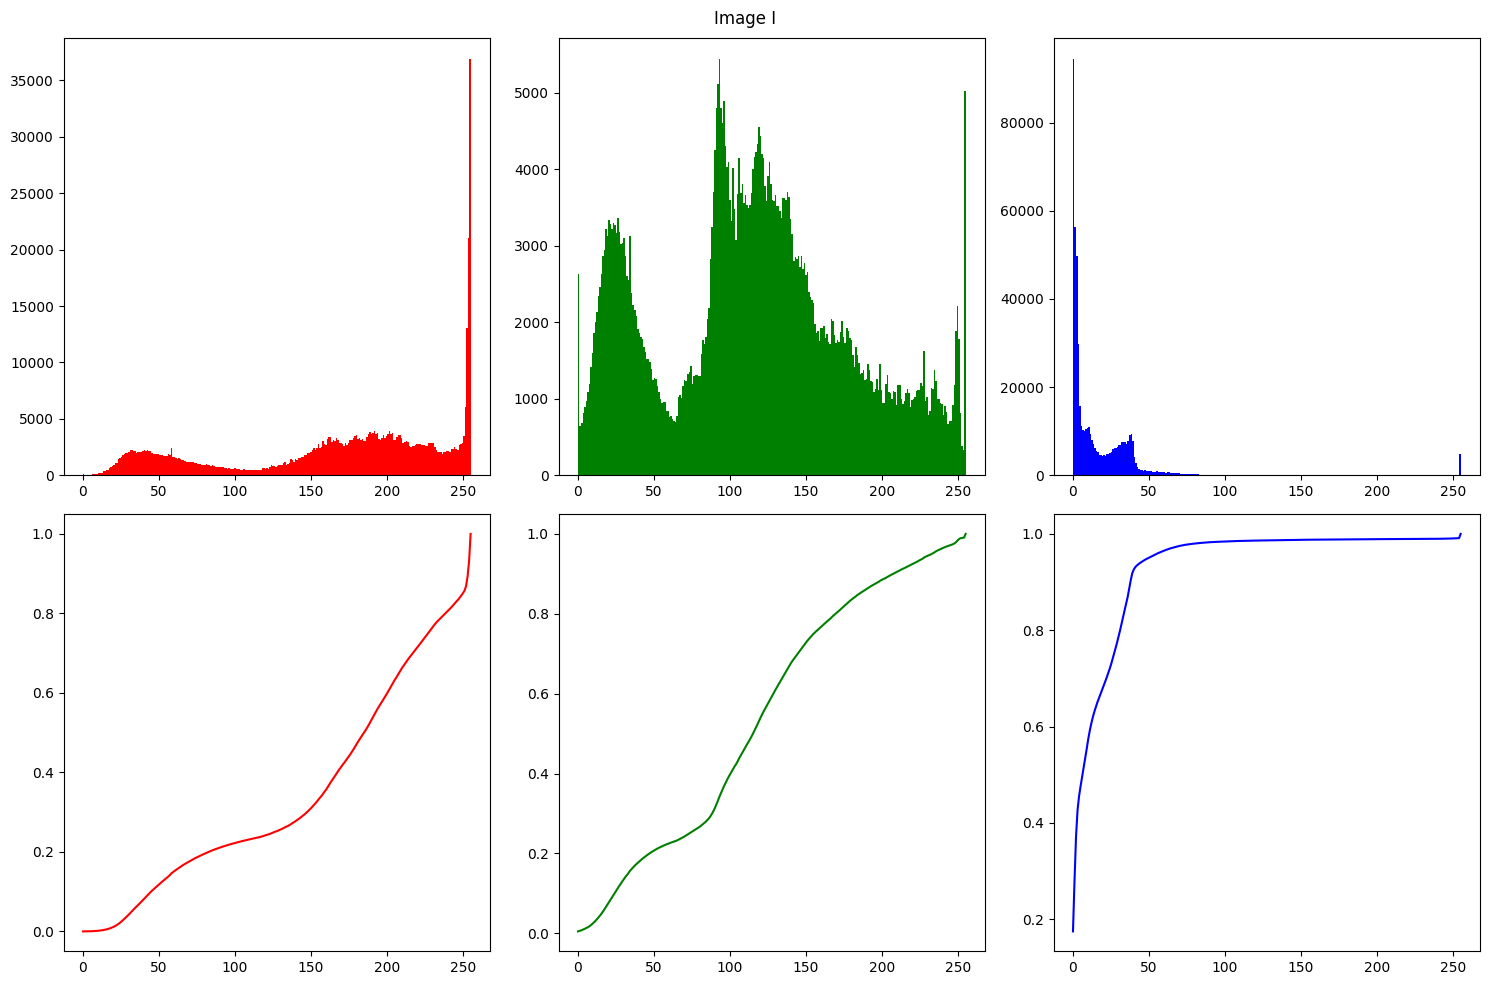

In [39]:
### histogram va cdf tren 3 kenh mau R-G-B cua anh I

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Image I")

axes[0, 0].hist(R_Image_I.ravel(), bins=256, color='r')
axes[0, 1].hist(G_Image_I.ravel(), bins=256, color='g')
axes[0, 2].hist(B_Image_I.ravel(), bins=256, color='b')

axes[1, 0].plot(cdf_R_I, color='r')
axes[1, 1].plot(cdf_G_I, color='g')
axes[1, 2].plot(cdf_B_I, color='b')

fig.tight_layout()
plt.show()

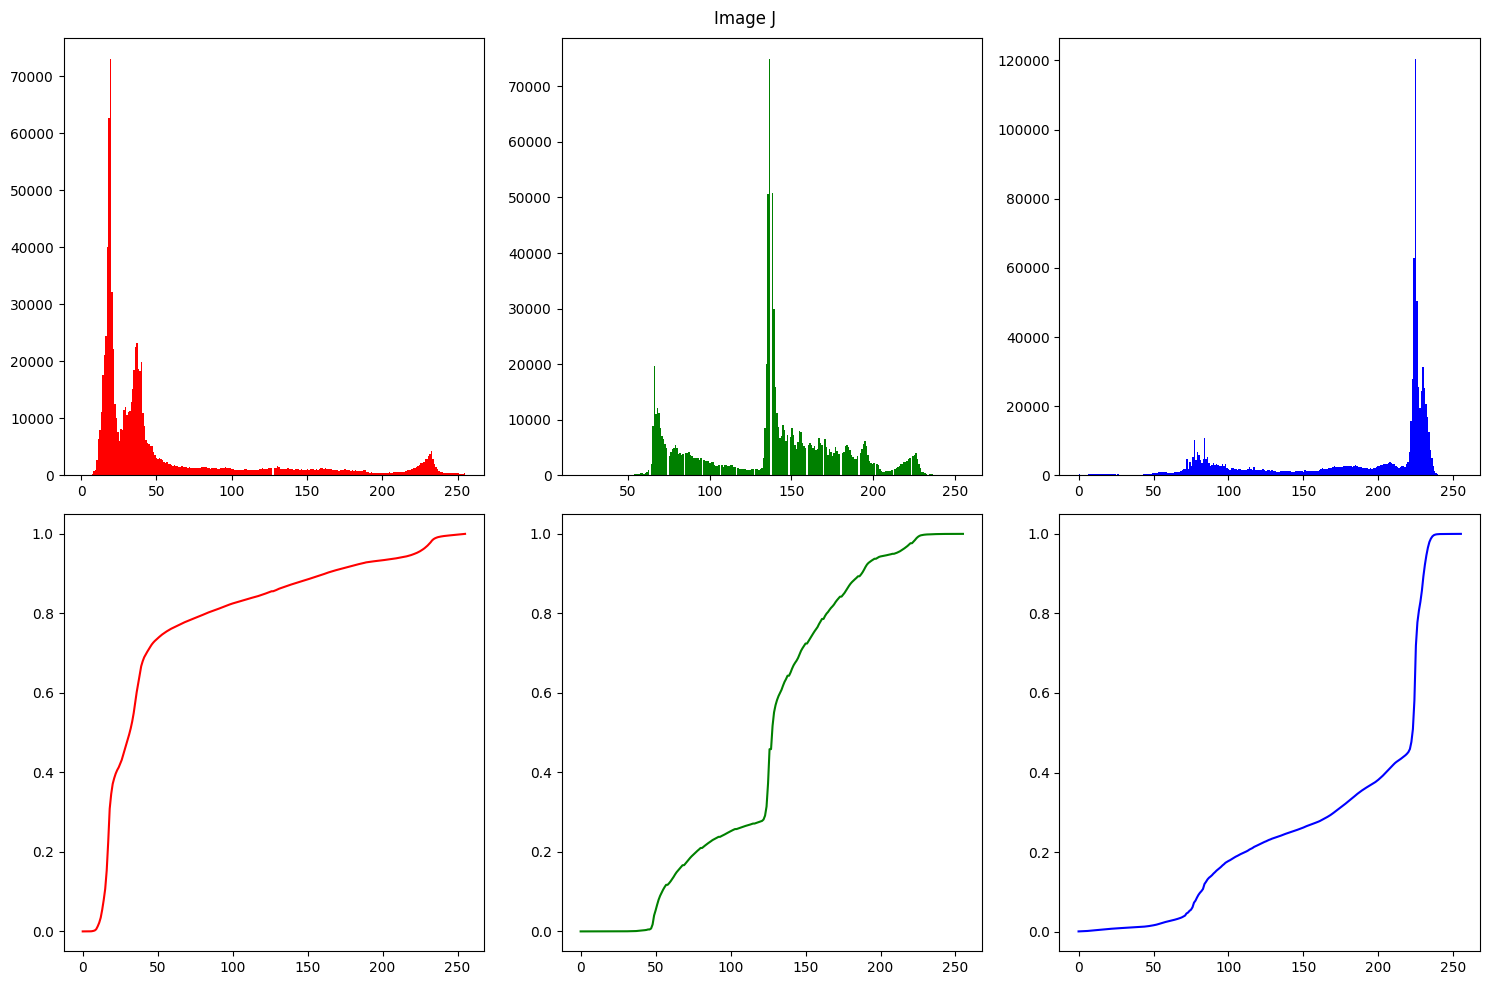

In [40]:
### histogram va cdf tren 3 kenh mau R-G-B cua anh I

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Image J")
axes[0, 0].hist(R_Image_J.ravel(), bins=256, color='r')
axes[0, 1].hist(G_Image_J.ravel(), bins=256, color='g')
axes[0, 2].hist(B_Image_J.ravel(), bins=256, color='b')

axes[1, 0].plot(cdf_R_J, color='r')
axes[1, 1].plot(cdf_G_J, color='g')
axes[1, 2].plot(cdf_B_J, color='b')

fig.tight_layout()

plt.show()

In [41]:
def remap_Image(im, LUT):
    remap = im.copy()
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            remap[i, j] = LUT[im[i, j]]
    return remap

In [42]:
# Tách 3 kênh màu của ảnh I và ảnh J
channel_I = cv2.split(image_I)
channel_J = cv2.split(image_J)

# Khởi tạo 3 kênh màu cho ảnh K
channel_K = []

for i in range(3):
    cdf_image_I = get_cdf(channel_I[i], 256)
    cdf_image_J = get_cdf(channel_J[i], 256)
    LUT = np.zeros(256)
    gJ = 0
    for gI in range(256):
        while gJ < 255 and cdf_image_J[gJ + 1] < cdf_image_I[gI]:
            gJ += 1
        LUT[gI] = gJ
    channel_K.append(remap_Image(channel_I[i], LUT))
    
image_K = cv2.merge(channel_K)
    

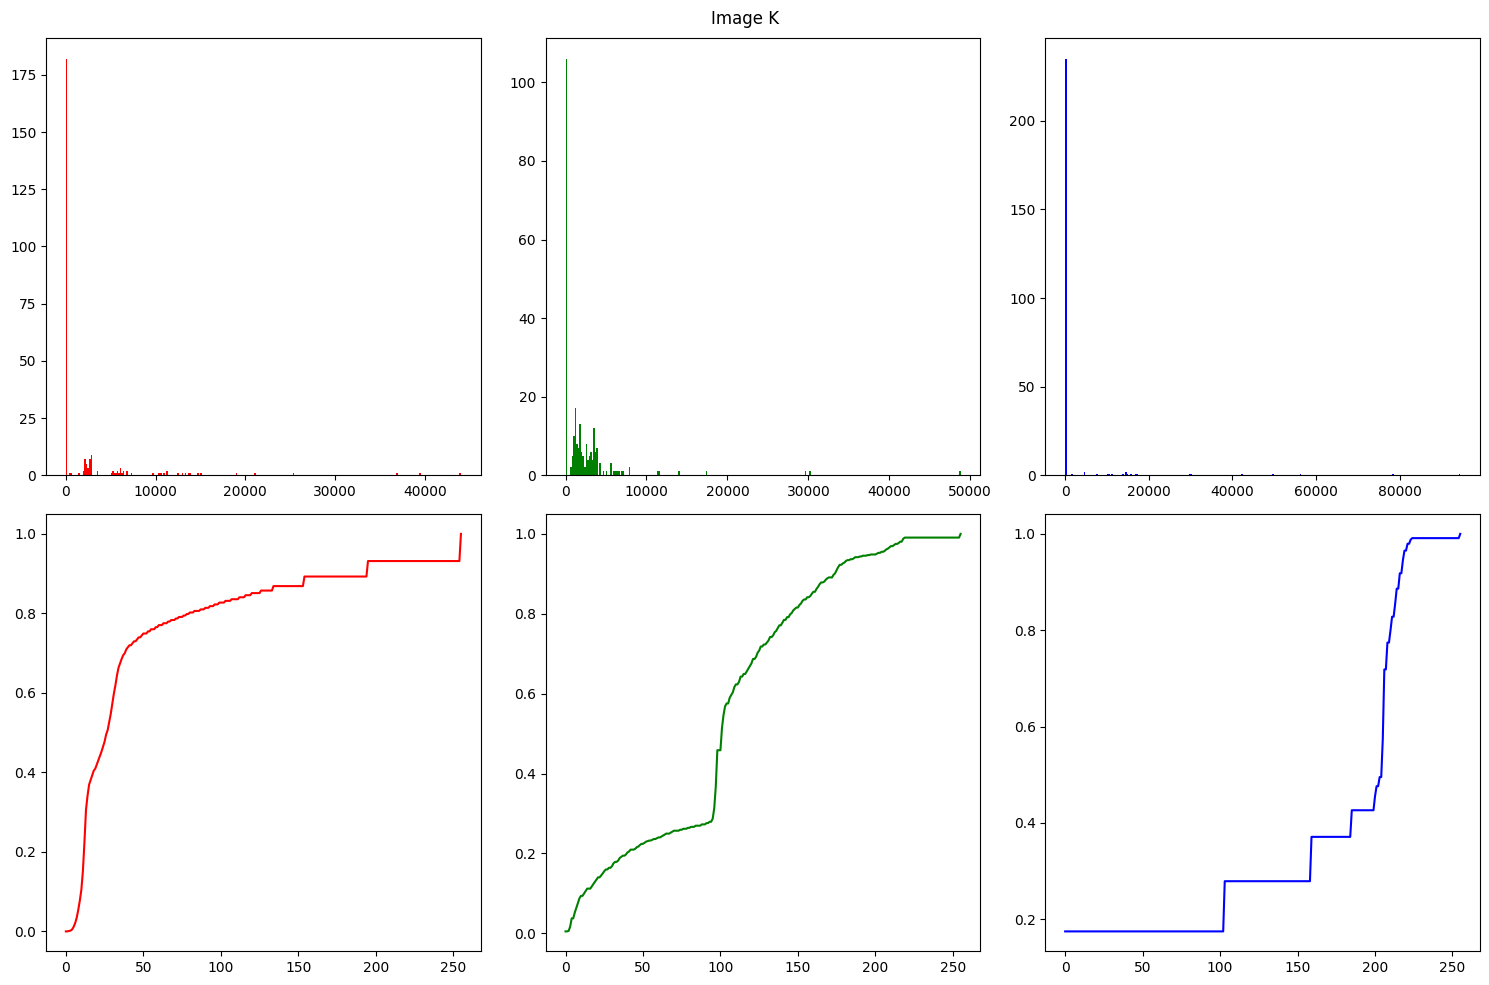

In [44]:
### histogram va cdf tren 3 kenh mau R-G-B cua anh K

# tach tung kenh mau cua moi anh
R_Image_K, G_Image_K, B_Image_K = cv2.split(image_K)


# tinh histogram cho tung kenh mau
# Image_K
hist_R_K = get_hist(R_Image_K, bins=256)
hist_G_K = get_hist(G_Image_K, bins=256)
hist_B_K = get_hist(B_Image_K, bins=256)

# tinh cdf cho tung kenh mau
# image_I
cdf_R_K = np.cumsum(hist_R_K) / (image_K.shape[0] * image_K.shape[1])
cdf_G_K = np.cumsum(hist_G_K) / (image_K.shape[0] * image_K.shape[1])
cdf_B_K = np.cumsum(hist_B_K) / (image_K.shape[0] * image_K.shape[1])


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Image K")

axes[0, 0].hist(hist_R_K.ravel(), bins=256, color='r')
axes[0, 1].hist(hist_G_K.ravel(), bins=256, color='g')
axes[0, 2].hist(hist_B_K.ravel(), bins=256, color='b')

axes[1, 0].plot(cdf_R_K, color='r')
axes[1, 1].plot(cdf_G_K, color='g')
axes[1, 2].plot(cdf_B_K, color='b')

fig.tight_layout()
plt.show()

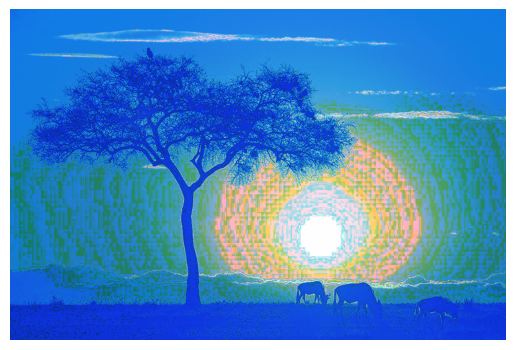

In [49]:
plt.imshow(image_K)
plt.axis("off")
plt.show()

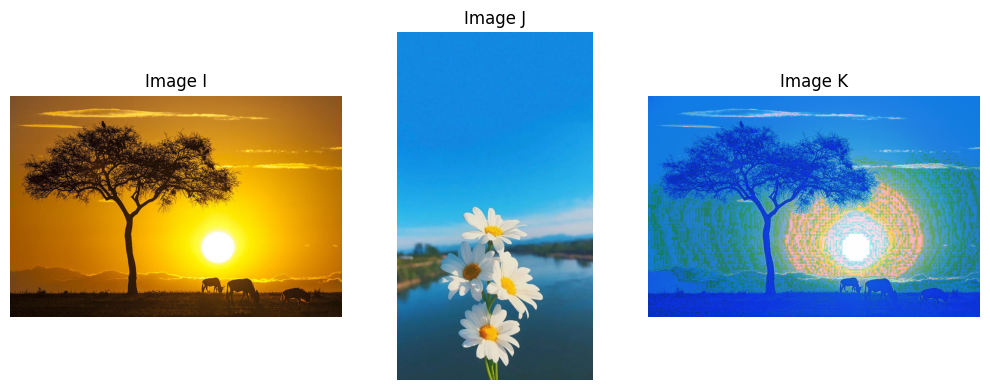

In [51]:
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image_I)
plt.axis('off')
plt.title("Image I")

plt.subplot(132)
plt.imshow(image_J)
plt.axis('off')
plt.title("Image J")

plt.subplot(133)
plt.imshow(image_K)
plt.axis('off')
plt.title("Image K")

plt.tight_layout()
plt.show()